### Read the feature engineered data

In [1]:
import pandas as pd
import os
import random
filename = 'df_kickstarterFE.csv'

p = 1  # x% of the lines
# keep the header, then take only x% of lines
# if random from [0,1] interval is greater than p the row will be skipped
df = pd.read_csv(filename, header=0,  skiprows=lambda i: i>0 and random.random() > p)
len(df)
#df=df[:1000]
#len(df)

579140

In [2]:
df.head()

,Unnamed: 0,Launch_deadline_days,Cat_Name,country,staff_pick,state,backers_count,blurb,goal,launched_at,usd_pledged,deadline,name
0,0,30,0,0,0,0,108,"In the year 2025, a young man's superintellige...",4000.0,0,5265.820000,0,A Date in 2025 - A sci-fi comedy short film
1,1,44,1,0,1,0,37,Replacement Place needs your support to combat...,5000.0,1,5225.000000,1,Replacement Place | New York Live Arts
2,2,14,2,0,0,0,27,Pumpkin Spice Love - A Pumpkin Spice 4 Life 30...,250.0,0,362.000000,2,Pumpkin Spice Love!
3,3,30,3,0,0,0,184,Single mama and her 4-year old sail with all-f...,15000.0,2,15678.000000,3,Pirate Mama
4,4,30,4,1,0,0,169,SparKit wishes to produce kit-set Wimshurst Ma...,2500.0,3,7978.645365,4,SparKit - Miniature Electrostatic Generator


In [3]:
df = df.drop(['Unnamed: 0','state','blurb','name'],axis=1)

In [4]:
import numpy as np
df['usd_pledged'] = np.log1p(df['usd_pledged'])
df['goal'] = np.log1p(df['goal'])

In [5]:
df=df.drop_duplicates()

## Splitting data into train and test

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25,random_state=1)
x_train = train.drop(['usd_pledged'],axis=1)
y_train = train['usd_pledged']
x_test = test.drop(['usd_pledged'],axis=1)
y_test = test['usd_pledged']

In [7]:
x_test.shape

(42963, 8)

## XgBoost Model

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [10]:
#RandomizedSearch for patameters, but will return different results every time I run, so just choose one set of all results
clf = xgb.XGBRegressor(objective ='reg:linear')

param_grid = {
        'max_depth': [5, 8, 10, 15],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'alpha': [0, 0.5, 1.0, 5, 10],
        'n_estimators': [10,20,30,40,50]}


rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=5,
                            refit=False, random_state=42)
print("Randomized search..")
rs_clf.fit(x_train, y_train)

Randomized search..
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.8s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.8s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.8s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.8s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.8s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   6.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   6.3s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   6.3s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   6.3s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   6.3s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   1.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   1.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   1.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   1.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   1.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   1.4s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   1.5s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   5.3s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   5.2s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   5.2s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   5.3s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   5.3s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   4.7s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   4.8s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   4.8s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   4.8s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   4.7s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   2.5s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   2.5s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   2.5s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   2.6s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   2.6s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   6.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   6.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   6.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   6.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   6.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   1.3s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   1.3s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   1.3s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   1.3s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   1.3s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   1.6s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   1.6s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   1.6s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   1.6s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   1.6s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   1.4s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   1.4s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   1.5s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   1.1s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   1.1s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   1.1s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   1.1s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   1.1s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   1.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   1.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   1.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   1.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   1.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   5.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   5.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   5.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   5.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   5.2s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   3.1s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   3.3s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   3.2s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   3.2s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   3.3s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   1.3s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   1.3s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   1.3s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   1.3s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   1.3s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   1.5s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   2.2s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   2.2s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   2.2s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   2.2s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   2.2s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   3.7s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   3.8s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   3.7s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   3.7s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   3.8s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   3.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   3.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   3.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   3.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   3.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [5, 8, 10, 15], 'learning_rate': [0.001, 0.01, 0.1, 0.2], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'alpha': [0, 0.5, 1.0, 5, 10], 'n_estimators': [10, 20, 30, 40, 50]},
          pre_dispatch='2*n_jobs', random_state=42, refit=False,
          return_train_score='warn', scoring=None, verbose=2)

In [16]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 10, alpha = 1, n_estimators = 30)

In [17]:
xg_reg.fit(x_train,y_train)
preds_model = xg_reg.predict(x_test)

/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/qifuyin/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [18]:
mse = mean_squared_error(y_test, preds_model)
print("MSE: %f" % (mse))

MSE: 0.717315


# Statistics for Net Profits Metrics (With Log)

In [19]:
over=(df['goal']<df['usd_pledged']) #over-funding rate
(np.sum(df['usd_pledged'][over]))/(np.sum(df['goal'][over]))

1.0638563101808225

In [20]:
gain=(test['goal']>test['usd_pledged']) & (preds_model<test['usd_pledged'])
gain_sum=np.sum(preds_model[gain])*1.064 
loss_1=(test['goal']<test['usd_pledged']) & (preds_model>test['usd_pledged'])
loss_sum_1=np.sum(test['usd_pledged'][loss_1])
loss_2=(test['goal']<test['usd_pledged']) & (preds_model<test['usd_pledged'])
loss_sum_2=np.sum(test['usd_pledged'][loss_2]-preds_model[loss_2]*1.064)
gain_sum-loss_sum_1-loss_sum_2

33166.80897151001

In [21]:
per_get_old=(test['goal']<test['usd_pledged']) #actual obtained fund to total availavle fund ratio before model
(np.sum(test['usd_pledged'][per_get_old]))/(np.sum(test['usd_pledged']))

0.6829959789218044

In [22]:
per_get_new=(preds_model<test['usd_pledged']) #actual obtained fund to total availavle fund ratio after model
(np.sum(preds_model[per_get_new]))/(np.sum(test['usd_pledged']))

0.7642494950462543

In [23]:
np.sum(test['goal']<test['usd_pledged'])/len(test) #success rate for projects before model

0.5207736889881992

In [24]:
np.sum(preds_model<test['usd_pledged'])/len(test)#success rate for projects after model

0.6901287154062798

In [25]:
np.mean(preds_model/test['goal'])#average new goal(predict) to old goal ratio

0.7699330790723841

In [26]:
np.mean(test['usd_pledged']/test['goal'])#average actual pledged to goal ratio

0.8017412148997571

In [27]:
gain_total=(test['goal']>test['usd_pledged']) #perfect scenario
np.sum(test['usd_pledged'][gain_total])

85021.14808964498

# Statistics for Net Profits Metrics (Convert back to Normal Value)

In [28]:
#convert back to original normal value 
preds_e=np.expm1(preds_model)
goal_e=np.expm1(test['goal'])
usd_pledged_e=np.expm1(test['usd_pledged'])
goal_total_e=np.expm1(df['goal'])
usd_pledged_total_e=np.expm1(df['usd_pledged'])

In [29]:
over_e=(goal_total_e<usd_pledged_total_e) #over-funding rate
(np.sum(usd_pledged_total_e[over_e]))/(np.sum(goal_total_e[over_e]))

2.3936602853498625

In [30]:
#calculate the next profit metrics
gain_e=(goal_e>usd_pledged_e) & (preds_e<usd_pledged_e)
gain_sum_e=np.sum(preds_e[gain_e])*2.4 
loss_1_e=(goal_e<usd_pledged_e) & (preds_e>usd_pledged_e)
loss_sum_1_e=np.sum(usd_pledged_e[loss_1_e])
loss_2_e=(goal_e<usd_pledged_e) & (preds_e<usd_pledged_e)
loss_sum_2_e=(np.sum(usd_pledged_e[loss_2_e]-preds_e[loss_2_e]*2.4))
gain_sum_e-loss_sum_1_e-loss_sum_2_e

52914400.78283405

In [31]:
pd.DataFrame({'pledged':usd_pledged_e, 'goal': goal_e,'predict':preds_e})

,pledged,goal,predict
36611,3943.000000,650.0,2797.646240
180891,3477.000000,3000.0,2864.133057
110959,113.000000,3000.0,202.971985
14672,71.000000,2109.0,150.152908
109059,0.000000,7300000.0,0.131223
28083,7164.000000,7000.0,3471.174805
158535,3335.000000,3000.0,2656.204102
154764,6404.000000,6000.0,5061.411621
56138,11798.183580,10000.0,6670.603027
191542,1123.545914,41800.0,438.841675


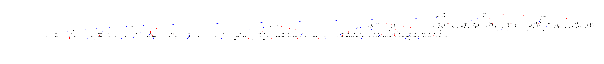

In [44]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

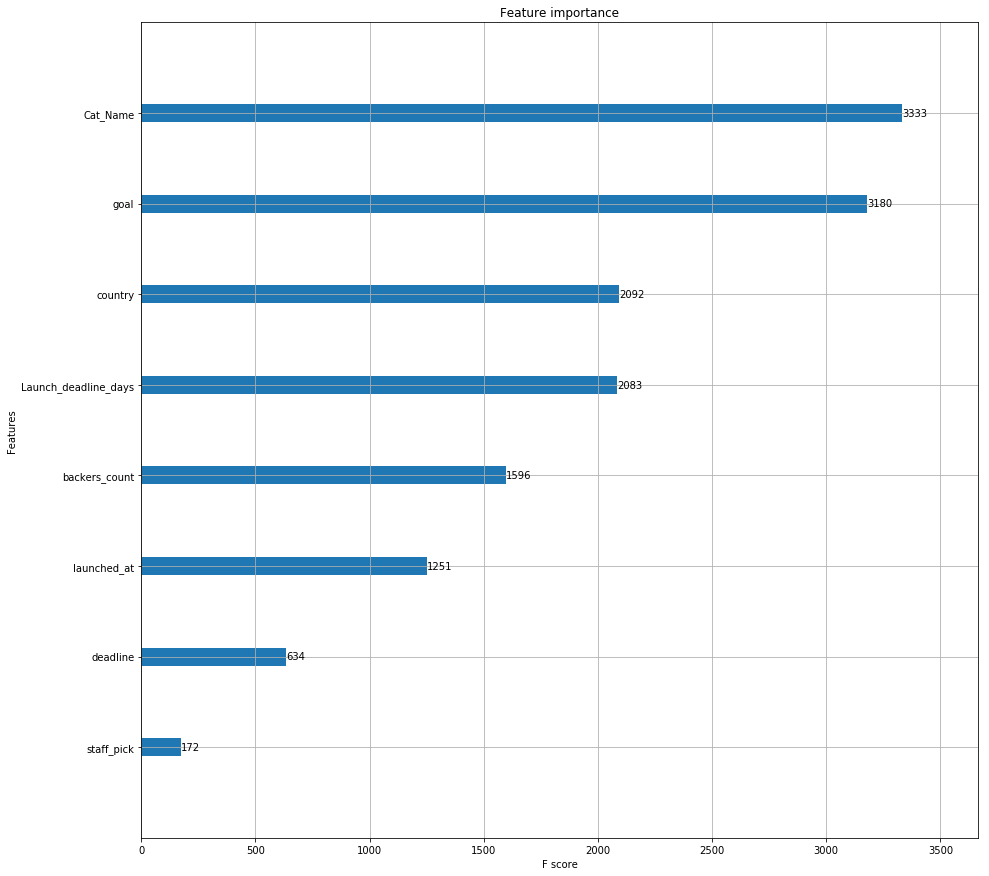

In [42]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()